# Object Oriented Programming (OOP) lecture 2
# Relations between objects



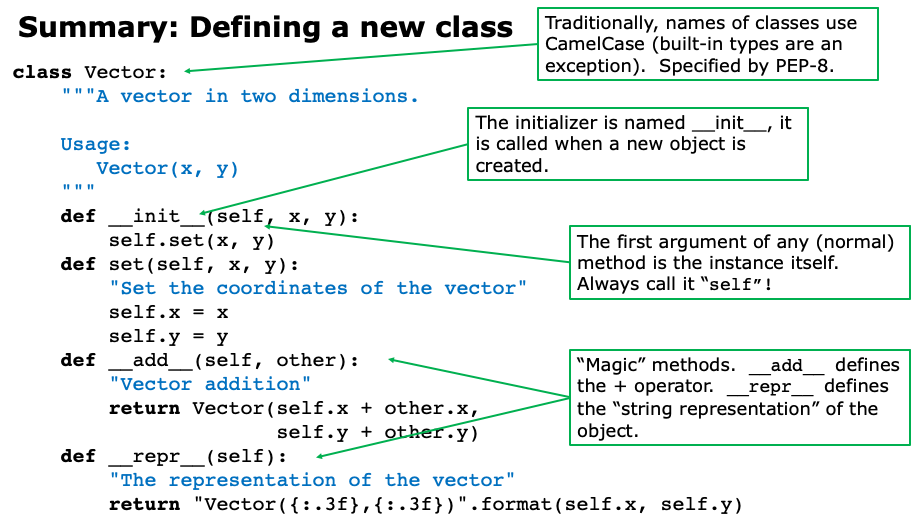

In [ ]:
class Vector:
    """A vector in two dimensions.
    
    Usage:
       Vector(x, y)
    """
    def __init__(self, x, y):
        self.set(x, y)
    def set(self, x, y):
        "Set the coordinates of the vector"
        self.x = x
        self.y = y
    def __add__(self, other):
        "Vector addition"
        return Vector(self.x + other.x, self.y + other.y)
    def __repr__(self):
        "The representation of the vector"   # This is a useless docstring!
        return "Vector({:.3f}, {:.3f})".format(self.x, self.y)

In [ ]:
a = Vector(2.18281828, 3.141592)
b = Vector(1, 42)
print(a + b)

## Out-of-context Python tip number 2: 
## Mutable and immutable objects.

**Python objects come in two kinds: Mutable and Immutable**

* Mutable objects can be changed
  - Lists
  - The Vector class you wrote yesterday
  - numpy arrays (next topic)

* Immutable objects cannot be changed
  - Numbers. (You obviously cannot change the number 42)
  - Strings.  (Could have been made mutable, but there are reasons…)
  - Tuples.  (Like lists, but immutable)

Lists are mutable, they can be changed.

In [ ]:
a = [1, 2, 3, 4, 5]
print(a)
print(a[2])

In [ ]:
a[2] = 42
print(a)

Strings are immutable, they cannot be changed

In [ ]:
a = "A string"
print(a)
print(a[2])

In [ ]:
a[2] = "p"

### Tuples - like an immutable list

A tuple behaves like an immutable list.

The *thought behind tuples and lists* was not just one of mutability.  The idea was that lists are intended as arrays of data, usually of the same type, whereas tuples are intended as collections of data of different types.  This is *not enforced* in the language!

In practise, the important difference is mutability!

Tuples are used when arguments are passed to a function, and when multiple values are returned from a function.

In [ ]:
a = (1, 2, 3, 4, "Python")
print(a)
print(a[2])

In [ ]:
a[2] = "p"

Often the same syntax will modify a mutable object, but create a new immutable object.

In [ ]:
a = [1, 2, 3, 4, 5]    # A list is mutable
b = a
b += [6, 7]
print(a)
print(b)

In [ ]:
b = b + [8, 9]
print(a)
print(b)

In [ ]:
a = (1, 2, 3, 4, 5)    # A tuple is not mutable
b = a
b += (6, 7)
print(a)
print(b)

**What is going on?**

Since a tuple is immutable, the statement

``b += (6,7)``

is merely a shorthand for 

``b = b + (6, 7)``

**How is this implemented?**

* A list object defines the methods ``__add__`` (used for ``a + b``) and the method ``__iadd__`` (inplace addition, used for ``a += b``).

* A tuple only defines the method ``__add__``, since there is no ``__iadd__`` the ``+=`` operator defaults to ``a += b`` meaning ``a = a + b``.

**Note:** Nobody promise that a mutable object will define ``__iadd__``.  If it does not, then ``+=`` will create a new object instead of modifying the existing one!

## numpy - a most useful Python package for numerics in Python

The ``numpy`` package combines the flexibility of a high-level language with the computational speed of languages like C and Fortran.

Important stuff in ``numpy``:

* The ``array`` object: a multidimensional array focused on calculations.

* Mathematical functions and operators acting on whole arrays simultaneously.
  - ``sin``, ``cos``, ``sqrt``, ``exp`` +, *, ...
  
* Functions for matrix operations and linear algebra
  - Matrix multiplications (inner and outer products)
  - Matrix inversions and solving linear equations
  - Eigenvalues
  - ...
  
* A lot more ...
  - and if it is not in the ``numpy`` package, it is probably in ``scipy``.

**You should almost always use ``numpy`` arrays for vectors and arrays of numbers!**


A handful of Python extensions are used so often that there is a *convention for how to import them*, using a *standardized* short name to minimize typing. 

In [ ]:
import numpy as np

Create a 2D array from a list of lists.  The excessive extra linebreaks are for readability only.

In [ ]:
a = np.array(
    [
        [1.2, 3.4, 1.2],
        [3.3, 3.7, 2.3],
        [10.0, 0.0, 1.0]
    ]
)
print(a)

In [ ]:
a

Why does it look different when printed and when displayed by the notebook?

An object can have *two* string representations.  The method ``__str__`` is used when an object is printed or explicitly converted to a string.  The method ``__repr__`` is used when the object need to be (implicitly) represented as a string.  If ``__str__`` is missing, ``__repr__`` is used instead.

It is the intention that ``__str__`` returns something nice-looking, whereas ``__repr__`` should return something that can be evaluated to recreate the object (if practical).

### Creating ranges of numbers

In [ ]:
b = np.arange(3)
print(b)

In [ ]:
np.linspace(4.1, 9.9, 50)

Arrays have a shape (dimensions) and a datatype (normally float64 for real numbers)

In [ ]:
print(a.shape, a.dtype)
print(b.shape, b.dtype)

We can do element-wise operations on them.

*Note:* Yesterday, you imported the function ``sqrt`` from the ``math`` module.  The ``numpy`` module defines everything in ``math`` (plus a *lot* more), but in versions that can act on arrays.

In [ ]:
c = np.sin(a) # Element-wise sine
print(c)
print(c + a)  # Element-wise addition
print(c * a)  # Element-wise multiplication


We can do vector, matrix and tensor operations

In [ ]:
print(a)
print(b)
print(np.dot(a, b))

If dimensions do not match, broadcast rules are used when they make sense.

In [ ]:
a + 42

In [ ]:
a + b

More advanced stuff is also available in ``numpy``, such as eigenvalues and other linear algebra stuff.

In [ ]:
e, v = np.linalg.eig(a)
print("Eigenvalues:", e)
print("Eigenvectors:")
print(v)

### numpy arrays are mutable - but subtly different from lists.

Both can be "sliced", but slicing behaves differently!

Slicing is like indexing, but taking out multple elements.

In [ ]:
a = [1, 2, 3, 4, 5, 6, 7, 8, 9]    # A normal Python list
print(a[2])    # A single element of a
print(a[2:5])  # A slice: Elements from element 2 up to (but not including) element 5

With lists, slicing creates a new list.

In [ ]:
b = a[2:5]
b[0] = 42
print(a)   # Unchanged.
print(b)

Numpy arrays can also be sliced

In [ ]:
a = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9])     # A numpy array
print(a[2])    # A single element of a
print(a[2:5])  # A slice

Slicing numpy arrays does *not* copy data, instead it creates a "view" into the data.  This is because numpy arrays should operate efficiently on huge arrays, and you do not want to unnecessarily copy data.

In [ ]:
b = a[2:5]
b[0] = 42
print(a)   # Changed.
print(b)

You can always force a copy if you want to.

In [ ]:
b = np.array(a[2:5])   # This forces a copy
b[0] = -101
print(a)   # Not changed.
print(b)